In [1]:
import matplotlib.pyplot as plt
import torch
from matplotlib.pyplot import MultipleLocator
import numpy as np

In [19]:
def plot_l2_loss(x, y_nn1, y_nn2, y_gnn1, y_gnn2, y3, xlabel, ylabel, savedir):
    plt.clf()
    plt.rcParams.update({"font.size": 24})
    plt.figure(4, (20, 15), dpi=120)
    # plt.plot(x1, y1, 'o-', color='blue', label='PINN')
    # plt.plot(x2, y2, 's-', color='red', label='gPINN')
    x_major_locator=MultipleLocator(2)
    ax=plt.gca()
    ax.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
    ax.xaxis.set_major_locator(x_major_locator)
    plt.fill_between(x, y_nn1, y_nn2,  alpha=.5, linewidth=0, color='blue')
    plt.fill_between(x, y_gnn1, y_gnn2,  alpha=.5, linewidth=0, color='red')
    y1 = [(y_nn1[i]+y_nn2[i])/2 for i in range(min(len(y_nn1),len(y_nn2)))]
    y2 = [(y_gnn1[i]+y_gnn2[i])/2 for i in range(min(len(y_gnn1),len(y_gnn2)))]
    plt.plot(x, y_nn1, color='darkgray')
    plt.plot(x, y1, 'o-', color='black', label='PINN')
    plt.plot(x, y_nn2, color='darkgray')
    plt.plot(x, y_gnn1, color='orangered')
    plt.plot(x, y2, 's-', color='red', label='gPINN, w=0.01')
    plt.plot(x, y_gnn2, color='orangered')
    # plt.plot(x, y_gnn3, color='orangered')
    plt.plot(x, y3, '^-', color='blue', label='gPINN, w=1')
    # plt.plot(x, y_gnn4, color='orangered')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # plt.yscale('symlog')
    plt.yscale('log') 
    plt.legend(frameon=False)
    plt.savefig(savedir, bbox_inches = 'tight', dpi = 120)

In [125]:
def plot_l2_loss_2(x, y_nn1, y_nn2, y_gnn1, y_gnn2, xlabel, ylabel, savedir):
    plt.clf()
    plt.rcParams.update({"font.size": 24})
    plt.figure(4, (20, 15), dpi=120)
    # plt.plot(x1, y1, 'o-', color='blue', label='PINN')
    # plt.plot(x2, y2, 's-', color='red', label='gPINN')
    x_major_locator=MultipleLocator(5)
    ax=plt.gca()
    ax.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
    ax.xaxis.set_major_locator(x_major_locator)
    plt.fill_between(x, y_nn1, y_nn2,  alpha=.5, linewidth=0, color='blue')
    plt.fill_between(x, y_gnn1, y_gnn2,  alpha=.5, linewidth=0, color='red')
    y1 = [(y_nn1[i]+y_nn2[i])/2 for i in range(min(len(y_nn1),len(y_nn2)))]
    y2 = [(y_gnn1[i]+y_gnn2[i])/2 for i in range(min(len(y_gnn1),len(y_gnn2)))]
    plt.plot(x, y_nn1, color='cornflowerblue')
    plt.plot(x, y1, 'o-', color='blue', label='PINN')
    plt.plot(x, y_nn2, color='cornflowerblue')
    plt.plot(x, y_gnn1, color='orangered')
    plt.plot(x, y2, 's-', color='red', label='gPINN')
    plt.plot(x, y_gnn2, color='orangered')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(frameon=False)
    plt.savefig(savedir, bbox_inches = 'tight', dpi = 120)

In [3]:
a_pinn_l2_u_1 = torch.load('./l2_u-pinn-1')
a_pinn_l2_u_2 = torch.load('./l2_u-pinn-8')

a_pinn_l2_u_g_1 = torch.load('./l2_u_g-pinn-1')
a_pinn_l2_u_g_2 = torch.load('./l2_u_g-pinn-8')

a_pinn_pde_1 = torch.load('./pde_res-pinn-1')
a_pinn_pde_2 = torch.load('./pde_res-pinn-8')

In [4]:
# w=1
a_gpinn1_l2_u_1 = torch.load('./l2_u-gpinn-w_1.0-4')
a_gpinn1_l2_u_2 = torch.load('./l2_u-gpinn-w_1.0-8')

a_gpinn1_l2_u_g_1 = torch.load('./l2_u_g-gpinn-w_1.0-4')
a_gpinn1_l2_u_g_2 = torch.load('./l2_u_g-gpinn-w_1.0-8')

a_gpinn1_pde_1 = torch.load('./pde_res-gpinn-w_1.0-4')
a_gpinn1_pde_2 = torch.load('./pde_res-gpinn-w_1.0-8')

In [5]:
# w=0.01
a_gpinn_l2_u_1 = torch.load('./l2_u-gpinn-w_0.01-3')
a_gpinn_l2_u_2 = torch.load('./l2_u-gpinn-w_0.01-2')

a_gpinn_l2_u_g_1 = torch.load('./l2_u_g-gpinn-w_0.01-3')
a_gpinn_l2_u_g_2 = torch.load('./l2_u_g-gpinn-w_0.01-2')

a_gpinn_pde_1 = torch.load('./pde_res-gpinn-w_0.01-3')
a_gpinn_pde_2 = torch.load('./pde_res-gpinn-w_0.01-2')

In [26]:
y_nn1 = []
for value in a_pinn_pde_1.values():
    y_nn1.append(value.item())
    
y_nn2 = []
for value in a_pinn_pde_2.values():
    y_nn2.append(value.item())

In [27]:
y_gnn1 = []
for value in a_gpinn_pde_1.values():
    y_gnn1.append(value.item())
    
y_gnn2 = []
for value in a_gpinn_pde_2.values():
    y_gnn2.append(value.item())

In [28]:
y3 = []
for value in a_gpinn1_pde_1.values():
    y3.append(value.item())

In [9]:
x = []
for key in a_pinn_l2_u_1.keys():
    x.append(key[15:])

<Figure size 432x288 with 0 Axes>

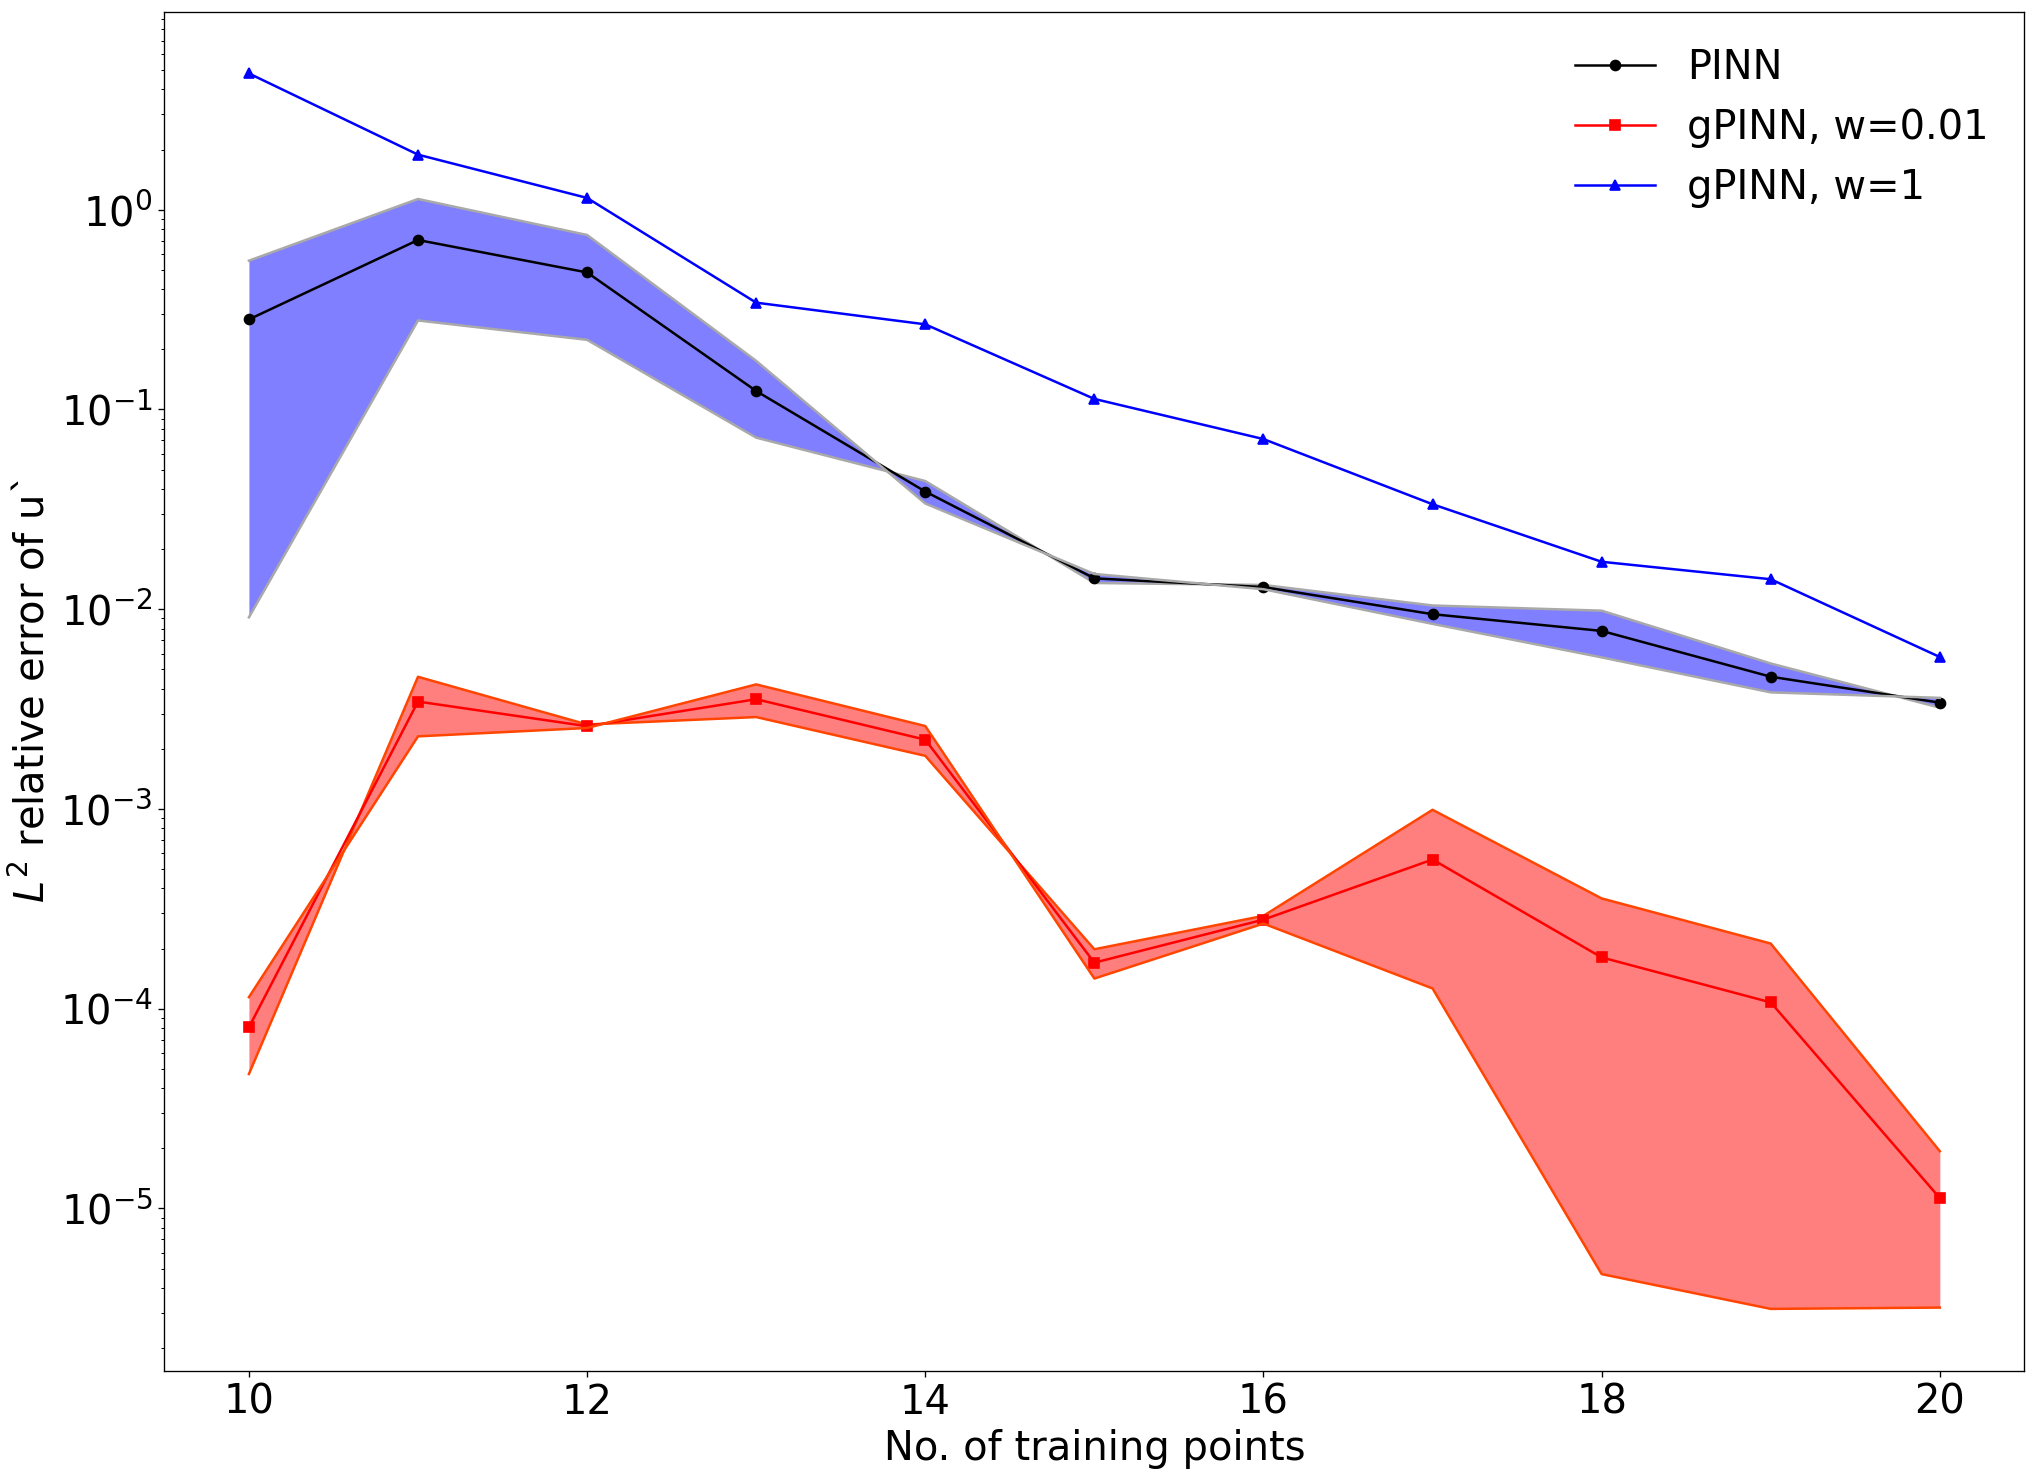

In [25]:
plot_l2_loss(x, y_nn1, y_nn2, y_gnn1, y_gnn2, y3, 'No. of training points', '$L^2$ relative error of u`', './L2 of u`.png')

<Figure size 432x288 with 0 Axes>

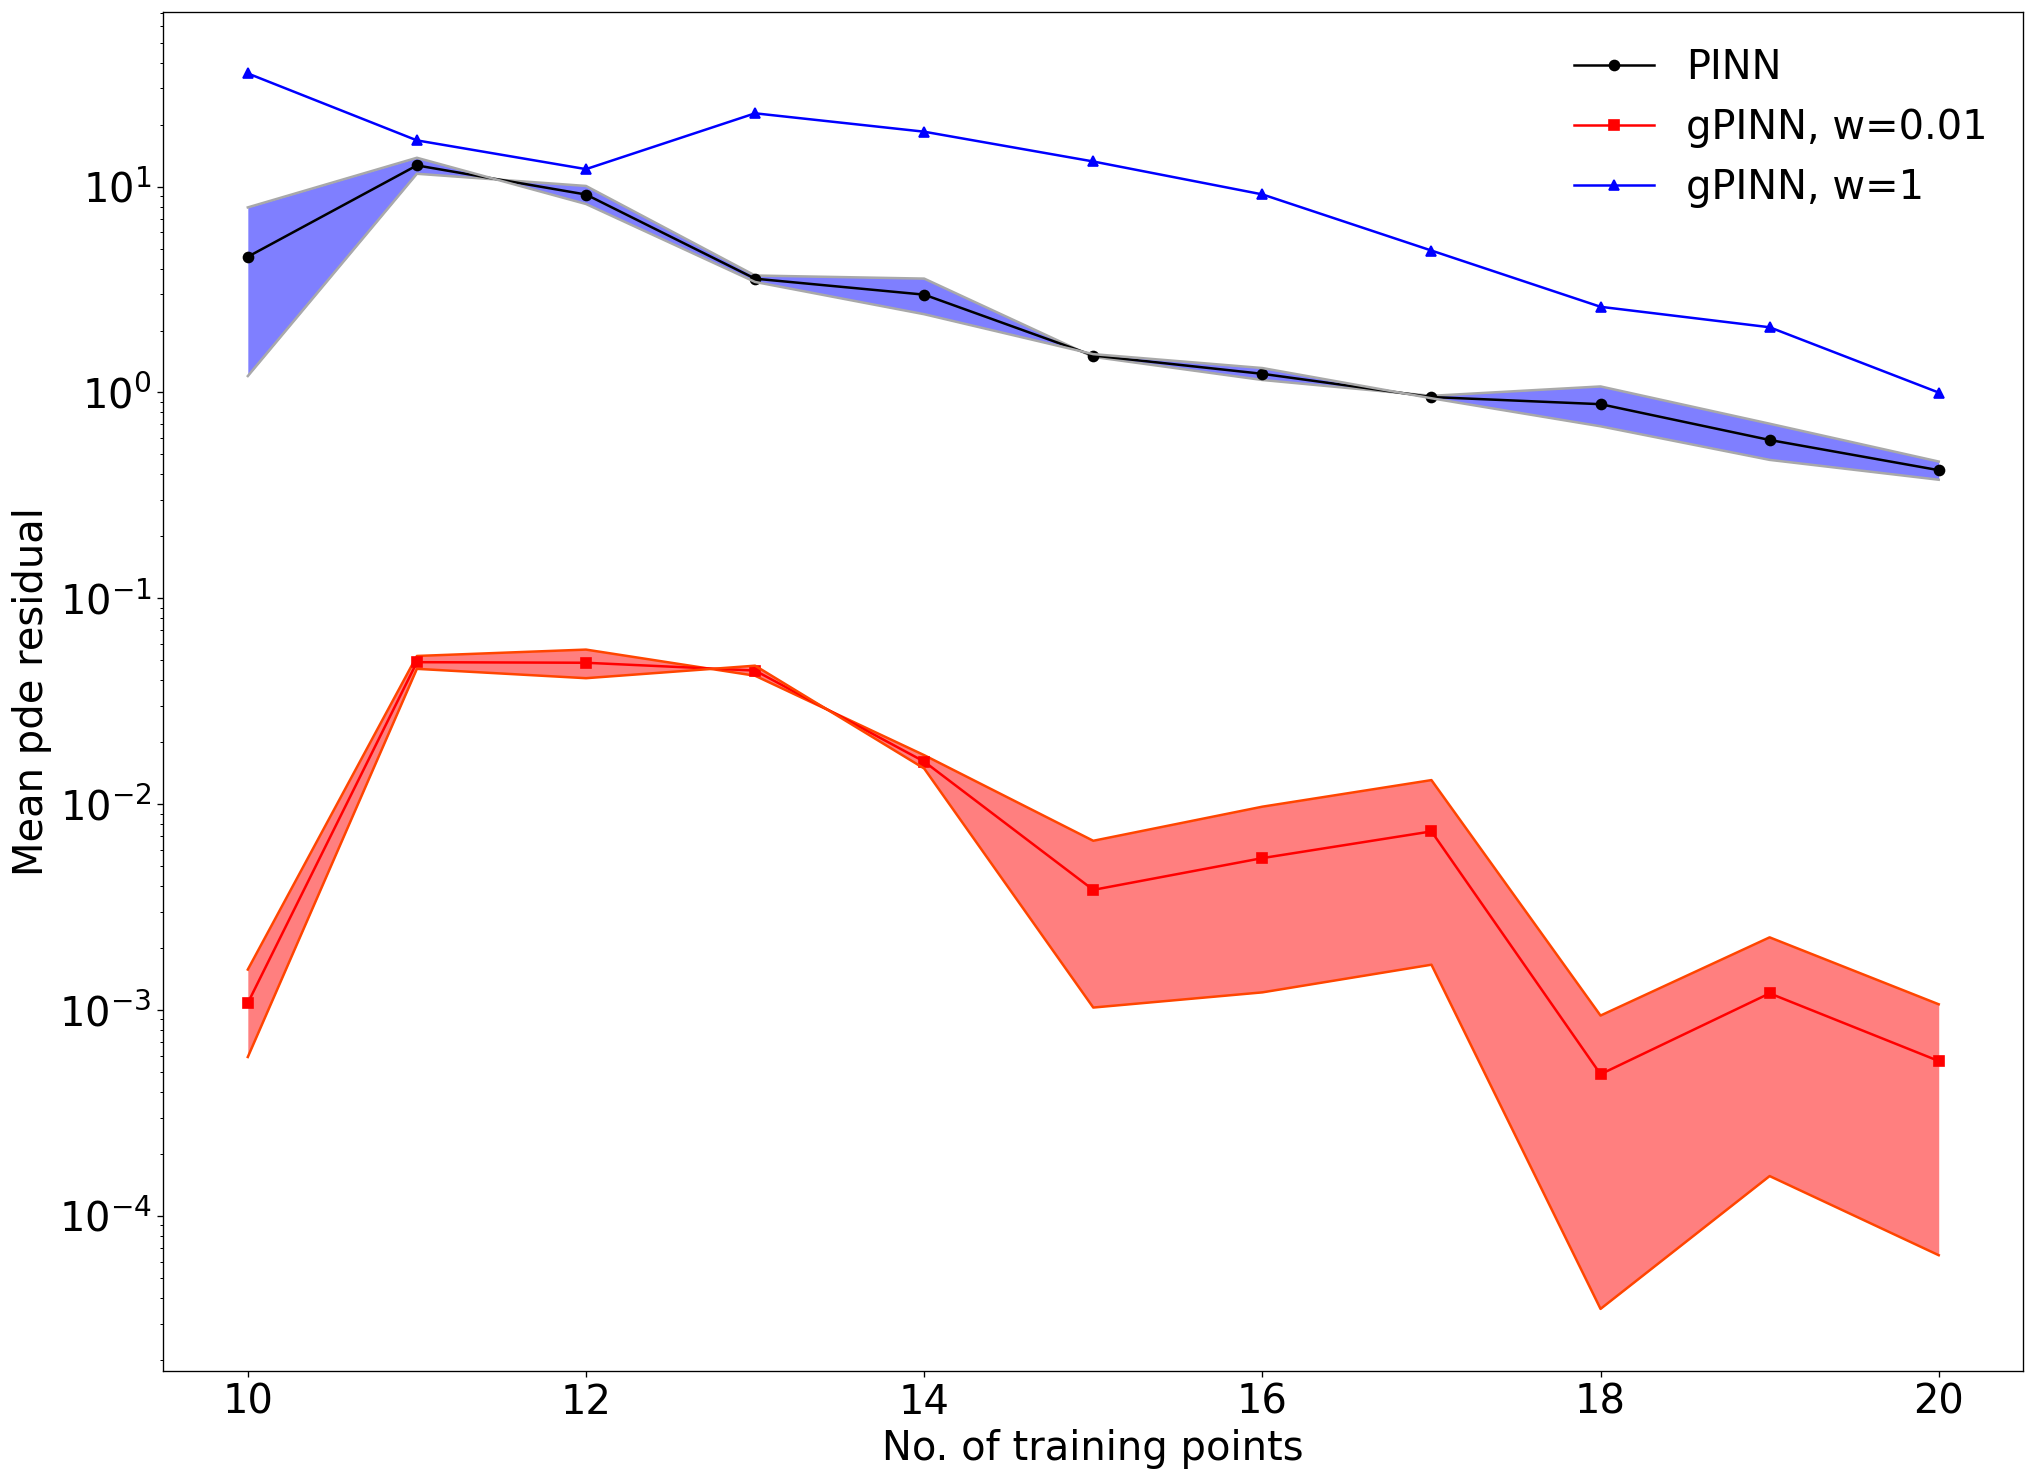

In [29]:
plot_l2_loss(x, y_nn1, y_nn2, y_gnn1, y_gnn2, y3,  'No. of training points', 'Mean pde residual', './pde error.png')